In [1]:
import pandas as pd
mtx_event = pd.read_csv("../mtx_event.csv", dtype = {'chr_no':str, 'mtx_type': str, 'mtx_time': str}, parse_dates = ['mtx_time'])

In [2]:
every_pt = pd.read_csv("../mtx_feature.csv", dtype = {'unique_id':str, 'event_id': str, 'first_treat_time': str}, parse_dates = ['first_treat_time'])

In [3]:
hcg = pd.read_csv("../hcg_trend.csv", dtype = {'unique_id':str, 'event_id': str, 'date': str, 'b_HCG' : str}, parse_dates = ['date'])
hcg['b_HCG'] = pd.to_numeric(hcg['b_HCG'].str.replace(',','')) # due to thousand ',' bHCG was recognized as str

In [4]:
mtx_event.head()

,chr_no,mtx_type,mtx_time
0,00090009,"2.5mg/tab, QID, 5 days",2017-05-27
1,00090009,"50mg, IM",2016-06-05
2,00162559,"50mg, IM",2015-07-06
3,00162559,"50mg, IM",2015-06-29
4,00174899,"2.5mg/tab, QID, 5 days",2017-09-21


In [5]:

every_pt.set_index('event_id', inplace = True)
every_pt.head()


,unique_id,treatment_dose,first_treat_time,Rx_type
event_id,,,,
00174899,00174899,1,2017-09-21,PO
00966135,00966135,1,2014-11-17,IM50
04337850,04337850,1,2017-08-21,IM50
04638056,04638056,1,2014-12-26,IM50
05535569,05535569,1,2016-09-19,IM50


In [6]:
every_pt['Rx_type']

event_id
00174899         PO
00966135       IM50
04337850       IM50
04638056       IM50
05535569       IM50
06413138         PO
09550212         PO
10230602       IM50
10663792      IM100
10871816       IM50
11476098       IM50
12150593_1     IM50
12712104         PO
13809810         PO
14288867         PO
00090009      PO&IM
00162559       IM50
04140245         PO
07214688       IM50
08251848       IM50
10077678       IM50
10241558       IM50
12150593_2     IM50
12401840       IM50
14109623      PO&IM
01221792      PO&IM
Name: Rx_type, dtype: object

In [7]:
hcg.head()

,unique_id,event_id,date,b_HCG,note,since_1st_Rx,1st_rx
0,00090009,00090009,2017-05-27,10482.00,NaN,0,pre-treatment
1,00090009,00090009,2017-06-03,20309.00,NaN,7,post-treatment
2,00090009,00090009,2017-06-16,252.07,NaN,20,post-treatment
3,00090009,00090009,2017-07-06,9.06,NaN,40,post-treatment
4,00162559,00162559,2013-12-20,211.60,NaN,-556,pre-treatment


In [8]:
hcg.loc[abs(hcg['since_1st_Rx\n'])>40] # too long time, eliminate
hcg.drop(axis = 0, labels = [4,15,32,43], inplace = True)

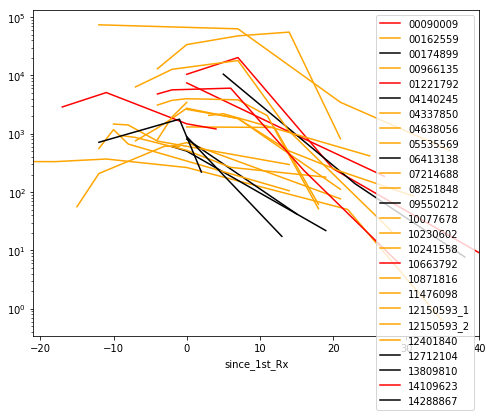

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
trend = hcg.groupby('event_id')

for name, group in trend:
    if every_pt.loc[name, 'Rx_type'] == 'PO':
        c = 'black'
    elif every_pt.loc[name, 'Rx_type'] == 'IM50':
        c = 'orange'
    else:
        c = 'red'
    group.plot(x = 'since_1st_Rx\n', y = 'b_HCG', ax = ax, label= name, logy = True, color = c)





In [10]:
# join pt group and hcg


In [16]:
with_zero = hcg.loc[hcg['since_1st_Rx\n'] == 0]
with_zero.head()

,unique_id,event_id,date,b_HCG,note,since_1st_Rx,1st_rx
0,00090009,00090009,2017-05-27,10482.00,NaN,0,pre-treatment
5,00162559,00162559,2015-06-29,2628.00,NaN,0,pre-treatment
9,00966135,00966135,2014-11-17,1313.00,NaN,0,pre-treatment
12,01221792,01221792,2017-02-18,7473.00,NaN,0,pre-treatment
20,04337850,04337850,2017-08-21,707.17,NaN,0,pre-treatment


In [28]:
eliminated = hcg.loc[hcg['event_id'].isin(with_zero['event_id'])]
eliminated.head()
for index, row in eliminated.iterrows():
    standard = with_zero.loc[with_zero['event_id'] == row['event_id']]['b_HCG']#
    #print(standard, index, row)
    # day 0 b-HCG
    eliminated.loc[index, 'corrected_b_HCG'] = row['b_HCG']/standard.values
    

/home/hermuba/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/hermuba/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
eliminated.head()

,unique_id,event_id,date,b_HCG,note,since_1st_Rx,1st_rx,corrected_b_HCG
0,00090009,00090009,2017-05-27,10482.00,NaN,0,pre-treatment,1.000000
1,00090009,00090009,2017-06-03,20309.00,NaN,7,post-treatment,1.937512
2,00090009,00090009,2017-06-16,252.07,NaN,20,post-treatment,0.024048
3,00090009,00090009,2017-07-06,9.06,NaN,40,post-treatment,0.000864
5,00162559,00162559,2015-06-29,2628.00,NaN,0,pre-treatment,1.000000


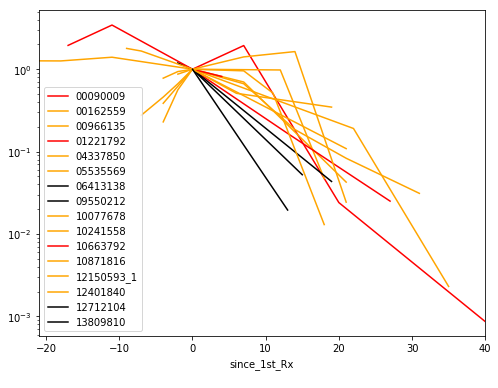

In [31]:
fig, ax = plt.subplots(figsize=(8,6))


trend = eliminated.groupby('event_id')



for name, group in trend:
    if every_pt.loc[name, 'Rx_type'] == 'PO':
        c = 'black'
    elif every_pt.loc[name, 'Rx_type'] == 'IM50':
        c = 'orange'
    else:
        c = 'red'
    group.plot(x = 'since_1st_Rx\n', y = 'corrected_b_HCG', ax = ax, label= name, logy = True, color = c)

In [ ]:
# propose out guideline
# 2nd Rx was sometimes based on pt 
# b-HCG is not well-correlated with LMP putative gestational age (show with plot)
